In [166]:
import pandas as pd
import numpy as np
import re

In [167]:
df = pd.read_csv('gurgaon_cleaned.csv')

In [252]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [169]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']"
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking',

## Area

In [170]:
df.sample(7)[['price','area','areaWithType']]

,price,area,areaWithType
3414,0.24,340.0,Carpet area: 340.09 (31.6 sq.m.)
194,2.25,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.)
3272,1.58,1150.0,Carpet area: 1150 (106.84 sq.m.)
2092,1.15,1350.0,Super Built up area 1350(125.42 sq.m.)
1548,4.55,3130.0,Super Built up area 3130(290.79 sq.m.)
2538,7.00,3850.0,Carpet area: 3850 (357.68 sq.m.)
1436,1.75,1900.0,Super Built up area 1900(176.52 sq.m.)Carpet area: 1240.04 sq.ft. (115.2 sq.m.)


In [171]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [172]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [173]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [174]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [175]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3406,3.50,flat,2050.0,Carpet area: 2054 (190.82 sq.m.),NaN,NaN,2054.0
153,0.80,house,(111 sq.m.) Plot Area,Plot area 1200(111.48 sq.m.),NaN,NaN,NaN
1450,0.89,flat,2040.0,Super Built up area 2025(188.13 sq.m.),2025.0,NaN,NaN
2384,1.15,flat,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up area: 1186 sq.ft. (110.18 sq.m.)Carpet area: 1130 sq.ft. (104.98 sq.m.),1760.0,1186.0,1130.0
302,3.20,house,(50 sq.m.) Plot Area,Plot area 60(50.17 sq.m.),NaN,NaN,NaN


In [176]:
all_nan = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())) ]

In [177]:
all_nan.shape

(571, 20)

In [178]:
all_nan.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,NaN,NaN
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,NaN,NaN
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terr

In [179]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [180]:
all_nan['built_up_area'] = all_nan['areaWithType'].apply(extract_plot_area)

<ipython-input-180-9cb8aef81d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan['built_up_area'] = all_nan['areaWithType'].apply(extract_plot_area)


In [181]:
all_nan.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,290.0,NaN
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,61.0,NaN
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Feng Shui / Vaastu Compliant', 'Private Garden / T

In [182]:
## scaling each value to square meters

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        ratio = row['area'] / row['built_up_area']
        if np.isclose(ratio, 9.0, atol=0.01):
            return row['built_up_area'] * 9
        elif np.isclose(ratio, 11.0, atol=0.01):
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [183]:
all_nan['area'] = pd.to_numeric(all_nan['area'], errors='coerce')
all_nan['built_up_area'] = pd.to_numeric(all_nan['built_up_area'], errors='coerce')

<ipython-input-183-0bb2efbab646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan['area'] = pd.to_numeric(all_nan['area'], errors='coerce')
<ipython-input-183-0bb2efbab646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan['built_up_area'] = pd.to_numeric(all_nan['built_up_area'], errors='coerce')


In [184]:
all_nan['built_up_area'] = all_nan.apply(convert_scale,axis=1)

<ipython-input-184-05c30fd01959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan['built_up_area'] = all_nan.apply(convert_scale,axis=1)


In [185]:
all_nan.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,bptp visionnaire,sector 70,5.25,20115.0,NaN,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,290.0,NaN
1,house,independent,sector 43,2.10,38251.0,NaN,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,61.0,NaN
2,house,independent,sector 54,5.00,43066.0,NaN,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park'

In [186]:
df.update(all_nan)

In [187]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom         1289
floorNum                 21
facing                 1142
agePossession             1
nearbyLocations         193
furnishDetails         1007
features                675
super_built_up_area    1955
built_up_area          2089
carpet_area            1904
dtype: int64

## Additional Room

In [188]:
df['additionalRoom'].value_counts()

additionalRoom
Servant Room                                     627
none                                             353
Study Room                                       232
Others                                           177
Pooja Room                                       132
Study Room,Servant Room                           81
servant room                                      80
Store Room                                        75
Pooja Room,Servant Room                           60
pooja room,study room,servant room,store room     60
others                                            53
Servant Room,Others                               52
pooja room                                        35
pooja room,study room,servant room                32
pooja room,study room,servant room,others         31
Servant Room,Pooja Room                           30
store room                                        29
Study Room,Others                                 27
Pooja Room,Study Room,Servant R

In [189]:
df['additionalRoom'].isnull().sum()

1289

In [190]:
df['additionalRoom'].fillna('none', inplace= True)

In [191]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [192]:
df['additionalRoom'].value_counts()

additionalRoom
none                                             1642
servant room                                      707
study room                                        250
others                                            230
pooja room                                        167
store room                                        104
study room,servant room                           100
pooja room,servant room                            83
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room,others          56
pooja room,study room,servant room                 55
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              23
pooja room,others                                  17
pooja room,store room                              16
servant room,

In [193]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room','others']

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [194]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
719,"store room,servant room",0,1,1,0,0
2390,servant room,0,1,0,0,0
44,"pooja room,servant room",0,1,0,1,0
2177,"study room,servant room",1,1,0,0,0
3352,"study room,servant room",1,1,0,0,0


In [195]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,290.0,NaN,0,1,0,0,0
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,61.0,NaN,0,1,0,0,0
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave',

## Age Possession

In [279]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,3.0,North-East,New Property,NaN,290.0,NaN,0,1,0,0,0,0,45
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,5.0,West,New Property,NaN,61.0,NaN,0,1,0,0,0,1,22
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,129.0,NaN,0,1,0,0,0,2,45
3,house,independent,sector 43,3.00,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12,3+,5.0,West,New Property,NaN,62.0,NaN,0,0,0,0,1,2,22
4,house,independent,sector 43,4.50,39062.0,(107 sq.m.) Plot Area,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,128.0,NaN,0,1,0,0,0,2,21


In [196]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1690
5 to 10 Year Old       591
0 to 1 Year Old        542
undefined              348
10+ Year Old           327
Under Construction      92
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Aug 2024                 5
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Aug 2025                 2
Jul 2025                 2
Sep 2025                 2
Mar 2025                 2
Jun 2027                 2
Oct 2025                 2
Jan 2026                 2
By 2027                  2
Jul 2027      

In [197]:
df['agePossession'].isnull().sum()

1

In [198]:
df['agePossession'].fillna('undefined', inplace= True)

In [199]:
def categorize_age(val):
  if pd.isna(val):
    return 'undefined'
  if '0 to 1 Year Old' in val or 'Within 6 months' in val or 'Within 6 months' in val:
    return 'New Property'
  if '1 to 5 Year Old' in val:
    return 'Relatively New'
  if '5 to 10 Year Old' in val:
    return 'Moderately Old'
  if '10+ Year Old' in val:
    return 'Old Property'
  ## for other entries
  try:
    ## Month 2024
    int(val.split(' ')[-1])
    return 'Under Construction'
  except:
    return 'undefined'

In [200]:
df['agePossession'] = df['agePossession'].apply(categorize_age)

In [201]:
df['agePossession'].value_counts()

agePossession
Relatively New        1690
New Property           612
Moderately Old         591
undefined              467
Old Property           327
Under Construction     194
Name: count, dtype: int64

In [202]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,New Property,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,290.0,NaN,0,1,0,0,0
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,New Property,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,61.0,NaN,0,1,0,0,0
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,Relatively New,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology']","['1 Water Purifier', '21 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '21 Geyser', '1 Stove', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '21 Bed', '21 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC

## Furnish Details

In [203]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2007,"['5 Wardrobe', '8 Fan', '1 Exhaust Fan', '3 Geyser', '1 Washing Machine', '1 Microwave', '5 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
876,"['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'Water Storage', 'No open drainage around', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"
2426,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3294,"['2 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Park', 'Piped-gas', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM']"
3207,[],"['Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [204]:
## Extracting alll unique furnishing from the furnishDetails col

all_furnishing = []
for details in df['furnishDetails'].dropna():
  furnishings = details.replace('[','').replace("'","").replace(']','').split(',')
  all_furnishing.extend(furnishings)
unique_furnishing = list(set(all_furnishing))

In [205]:
len(unique_furnishing)

320

In [206]:
## Extracting count of furnishing from frunishDeatials col

def get_furnishing_count(details, furnishing):
  if isinstance(details, str):
    if f"No {furnishing}" in details:
      return 0
    pattern = re.compile(f'(\d+) {furnishing}')
    match = pattern.search(details)
    if match:
      return int(match.group(1))
    elif furnishing in details:
      return 1
    return 0


In [207]:
new_cols = [re.sub(r'No |\d+','',furnishing).strip() for furnishing in unique_furnishing]
new_cols

['',
 'Fan',
 'Fan',
 'Bed',
 'Wardrobe',
 'Stove',
 'Bed',
 'Wardrobe',
 'AC',
 'Fan',
 'Wardrobe',
 'TV',
 'Dining Table',
 'Light',
 'Light',
 'AC',
 'Fan',
 'Light',
 'Chimney',
 'Light',
 'Wardrobe',
 'Fan',
 'AC',
 'Light',
 'TV',
 'Fan',
 'Geyser',
 'TV',
 'Light',
 'Geyser',
 'AC',
 'Fan',
 'Wardrobe',
 'Geyser',
 'Fan',
 'Wardrobe',
 'Light',
 'AC',
 'Stove',
 'Fan',
 'Fan',
 'TV',
 'Light',
 'Light',
 'Modular Kitchen',
 'Geyser',
 'Fan',
 'Microwave',
 'Light',
 'Curtains',
 'Geyser',
 'AC',
 'Fan',
 'Light',
 'Wardrobe',
 'Dining Table',
 'Light',
 'Dining Table',
 'Fan',
 'Light',
 'Wardrobe',
 'AC',
 'Wardrobe',
 'Sofa',
 'Geyser',
 'Light',
 'Light',
 'Fan',
 'Fan',
 'Fridge',
 'Geyser',
 'Fan',
 'AC',
 'Bed',
 'AC',
 'AC',
 'Wardrobe',
 'Bed',
 'Washing Machine',
 'Light',
 'Light',
 'Geyser',
 'Bed',
 'Light',
 'Fan',
 'Light',
 'Geyser',
 'Chimney',
 'Light',
 'Light',
 'Light',
 'Light',
 'Light',
 'Fan',
 'AC',
 'Light',
 'Wardrobe',
 'Bed',
 'Light',
 'Bed',
 'Ward

In [208]:
new_cols = list(set(new_cols))
new_cols

['',
 'Dining Table',
 'Wardrobe',
 'Fan',
 'Chimney',
 'Bed',
 'Modular Kitchen',
 'Sofa',
 'Fridge',
 'Stove',
 'Water Purifier',
 'Microwave',
 'Geyser',
 'Washing Machine',
 'Curtains',
 'Light',
 'Exhaust Fan',
 'TV',
 'AC']

In [209]:
new_cols.remove('')
new_cols

['Dining Table',
 'Wardrobe',
 'Fan',
 'Chimney',
 'Bed',
 'Modular Kitchen',
 'Sofa',
 'Fridge',
 'Stove',
 'Water Purifier',
 'Microwave',
 'Geyser',
 'Washing Machine',
 'Curtains',
 'Light',
 'Exhaust Fan',
 'TV',
 'AC']

In [210]:
len(new_cols)

18

In [211]:
## Create new column for each unique feature and update with counts

for furnishing in new_cols:
  df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

In [212]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Dining Table,Wardrobe,Fan,Chimney,Bed,Modular Kitchen,Sofa,Fridge,Stove,Water Purifier,Microwave,Geyser,Washing Machine,Curtains,Light,Exhaust Fan,TV,AC
2753,flat,emaar mgf emerald floors premier3.,sector 65,2.9,14683.0,1980.0,Carpet area: 1975 (183.48 sq.m.),4,4,0,store room,0.0,North,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Course Road', 'CK Birla Hospital', 'Delhi International Airport', 'Lemon Tree Hotel']","['6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1975.0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2522,flat,bptp terra3.,sector 37,1.8,8215.0,2190.0,Super Built up area 2191(203.55 sq.m.),4,3,3,study room,12.0,North,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['5 Fan', '1 Stove', '6 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",2191.0,NaN,NaN,1,0,0,0,0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0
1030,flat,emaar mgf palm hills4.,sector 77,1.5,12744.0,1180.0,Super Built up area 1450(134.71 sq.m.)Carpet area: 1177 sq.ft. (109.35 sq.m.),3,3,3,none,4.0,North-East,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Sohna Road', 'Narayana e Techno School', 'DPG Institute of Technology', 'Medeor Hospital, Manesar', 'Indira Gandhi International Airport', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'De Adventure Park']","['10 Wardrobe', '1 Water Purifier', '5 Fan', '2 Geyser', '1 Stove', '33 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center', 'Water softening plant']",1450.0,NaN,1177.0,0,0,0,0,0,0.0,10.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,33.0,0.0,0.0,4.0


In [213]:
furnishing_df = df[['furnishDetails']+ new_cols]

In [214]:
furnishing_df.sample(3)

,furnishDetails,Dining Table,Wardrobe,Fan,Chimney,Bed,Modular Kitchen,Sofa,Fridge,Stove,Water Purifier,Microwave,Geyser,Washing Machine,Curtains,Light,Exhaust Fan,TV,AC
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,"['6 Wardrobe', '16 Fan', '1 Exhaust Fan', '8 Geyser', '1 Stove', '94 Light', '11 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",0.0,6.0,16.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,0.0,94.0,1.0,0.0,11.0
331,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [215]:
furnishing_df.shape

(3881, 19)

In [216]:
furnishing_df.drop(columns = ['furnishDetails'], inplace = True)

<ipython-input-216-bc210b331178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishing_df.drop(columns = ['furnishDetails'], inplace = True)


In [217]:
furnishing_df.isnull().sum()

Dining Table       1007
Wardrobe           1007
Fan                1007
Chimney            1007
Bed                1007
Modular Kitchen    1007
Sofa               1007
Fridge             1007
Stove              1007
Water Purifier     1007
Microwave          1007
Geyser             1007
Washing Machine    1007
Curtains           1007
Light              1007
Exhaust Fan        1007
TV                 1007
AC                 1007
dtype: int64

In [218]:
df.iloc[10:17]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Dining Table,Wardrobe,Fan,Chimney,Bed,Modular Kitchen,Sofa,Fridge,Stove,Water Purifier,Microwave,Geyser,Washing Machine,Curtains,Light,Exhaust Fan,TV,AC
10,house,independent,sector 28,9.00,27778.0,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),6,7,3+,"study room,servant room,pooja room,store room",3.0,North,Moderately Old,"['Dlf phase 1 metro station', 'Huda city centre metro station', 'Iffco chowk metro station', 'New Life Church', 'Hanuman Mandir', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Sitaram Bhartia', 'Max Hospital', 'Dr. Kutbuddin Akbary', 'Sidhesh Hospital Gurgaon', 'Umkal Hospital', 'Marwah Clinic', 'Lord Krishna Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Divine Look Clinic Centre 1', 'Chikitsa', 'Guardian Pharmacy', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Indusind bank', 'Abn amro bank', 'Lord krishna bank', 'Hdfc bank', 'DT Cinemas', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Fat', 'Nowhere Brewpub and cafe', 'Dighent cafe', 'Drunken Monkey', 'Belgian Waffle', 'CCD', 'The Chicken Boat', 'Naveidyam', 'Balaji Vegetarian Paradise', 'Pizza Hut', 'Barbecue Grill', 'PWO house', 'Food Court', 'Stones2milestones', 'Bahrisons library', 'Ncr library']",NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,360.0,NaN,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,house,dlf city plots phase 3,sector 24,5.00,34083.0,(136 sq.m.) Plot Area,Plot area 163(136.29 sq.m.),13,13,3+,pooja room,4.0,North,New Property,"['Dlf phase 3 metro station', 'Micromax moulsari avenue metro station', 'Dlf phase 2 metro station', 'Guru dronacharya metro station', 'Indusind bank cyber city metro station', 'Vodafone belvedere towers metro station', 'Shri Shiv Shakthi Mandir', 'Icici bank ATM', 'Central bank ATM', 'Central bank atm teste 001112', 'Abn amro bank ATM', 'Citibank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Dental Cure and Care Centre', ""Dr. Khullar's Dental Clinic"", 'Garg Dental Care', 'Shri Ram Memorial Hospital', 'R.N Clinic', 'Dental Harbour', 'Upkar Clinic', 'Asha Multispeciality Clinic', ""St Stephen's Hospital Health Care Facility"", 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Cosmodentz Dental Clinic', 'RBS Dental Clinic', 'Kailash Nursing Home Gurgaon', 'Krishna Family Clinic', 'Durga Poly Clinic', 'Anahat Hospital', 'Pharmacy', 'Shri Balaji Medical Store', 'State bank of india', 'Icici bank', 'Deutsche bank', 'Standard chartered bank', 'PVR Cinames', 'The God Father', 'Machaan', 'Food Court', 'Mc Donalds', 'barrique', ""McDonald's""]","['1 Water Purifier', '1 Fridge', '21 Fan', '1 Exhaust Fan', '1 Dining Table', '13 Geyser', '1 Stove', '20 Light', '1 Chimney', '9 TV', '18 AC', '1 Modular Kitchen', '1 Curtains', '7 Wardrobe', '14 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,163.0,NaN,0,0,0,1,0,1.0,7.0,21.0,1.0,14.0,1.0,1.0,1.0,1.0,1.0,1.0,13.0,1.0,1.0,20.0,1.0,9.0,18.0
12,house,independent,sector 26,15.00,33200.0,(420 sq.m.) Plot Area,Plot area 502(419.74 sq.m.),5,6,3+,"pooja room,study room,servant room,store room",3.

In [219]:
## null_Df = furnishing_df[furnishing_df.isnull().any(axis=1)]
furnishing_df.fillna(0, inplace = True)

<ipython-input-219-03c98de77816>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishing_df.fillna(0, inplace = True)


In [220]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [221]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(furnishing_df)

In [222]:
## elbow method

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++')
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

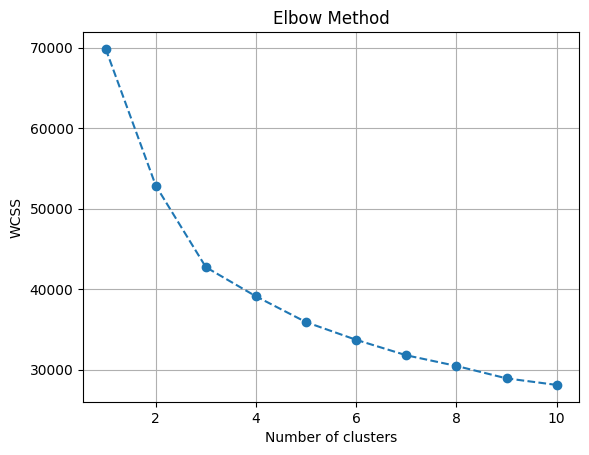

In [223]:
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [224]:
n_clusters = 3

## Fit the model
kmeans = KMeans(n_clusters= n_clusters, init= 'k-means++')
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [225]:
## predict cluster assignment for each row

cluster_labels = kmeans.predict(scaled_df)

In [226]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Dining Table,Wardrobe,Fan,Chimney,Bed,Modular Kitchen,Sofa,Fridge,Stove,Water Purifier,Microwave,Geyser,Washing Machine,Curtains,Light,Exhaust Fan,TV,AC
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,New Property,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,290.0,NaN,0,1,0,0,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,New Property,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,61.0,NaN,0,1,0,0,0,0.0,0.0,3.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.0,0.0,0.0,0.0
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,Relatively New,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College 

In [227]:
## dropping the last 18 columns.

df = df.iloc[:,:-18]

In [228]:
df['furnishing_type'] = cluster_labels

In [229]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
1422,"['5 Fan', '3 Geyser', '5 Light', '5 AC', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
3044,NaN,1
665,"['1 Water Purifier', '16 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '25 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', '5 TV', '10 AC', '5 Wardrobe', '5 Bed', '1 Sofa', '1 Washing Machine', 'No Microwave']",2
2704,"['9 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1382,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Curtains', '7 AC', '1 Chimney', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",0


## Features

In [230]:
df[['society', 'features']].sample(5)

,society,features
2231,rof ananda,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Water softening plant']"
3533,mvn athens3.,"['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting']"
2637,dlf new town heights 24.,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
762,independent,"['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Rain Water Harvesting']"
3179,antriksh green,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Park']"


In [231]:
# features = df['features'].replace('[', '').replace(']','').replace('/',',').replace("'",'').split(',')

In [232]:
df['features'].isnull().sum()

675

In [233]:
app_df = pd.read_csv('appartments.csv')

In [234]:
app_df.head()

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"
3,Sobha City,"2, 3, 4 BHK Apartment in S

In [235]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [236]:
temp_df = df[df['features'].isnull()]

In [237]:
temp_df.shape

(675, 26)

In [239]:
x = temp_df.merge(app_df, left_on = 'society', right_on = 'PropertyName', how = 'left')['TopFacilities']

In [240]:
df.loc[temp_df.index, 'features'] = x

In [241]:
df['features'].isnull().sum()

627

In [243]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [244]:
## converting the string represenation of lists in 'features' col to list

df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

## Use MultiLabelBinarizer to convert the feature list into binary matrix
mlb = MultiLabelBinarizer()
features_matrix = mlb.fit_transform(df['features_list'])

## convert the binary matrix into DataFrame
features_df = pd.DataFrame(features_matrix, columns = mlb.classes_)

In [248]:
features_df.sample(5)

,24/7 Power Backup,24x7 Security,ATM,Aerobics Centre,Airy Rooms,Amphitheatre,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Card Room,Centrally Air Conditioned,Children's Play Area,Cigar Lounge,Club House,Club house / Community Center,Community Hall,Conference room,Creche/Day care,Cricket Pitch,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Mini Theatre,Multipurpose Court,Natural Light,Natural Pond,No open drainage around,Park,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Terrace Garden,Theatre,Toddler Pool,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1937,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
567,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3707,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [249]:
wcss_features = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++')
  kmeans.fit(features_df)
  wcss_features.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

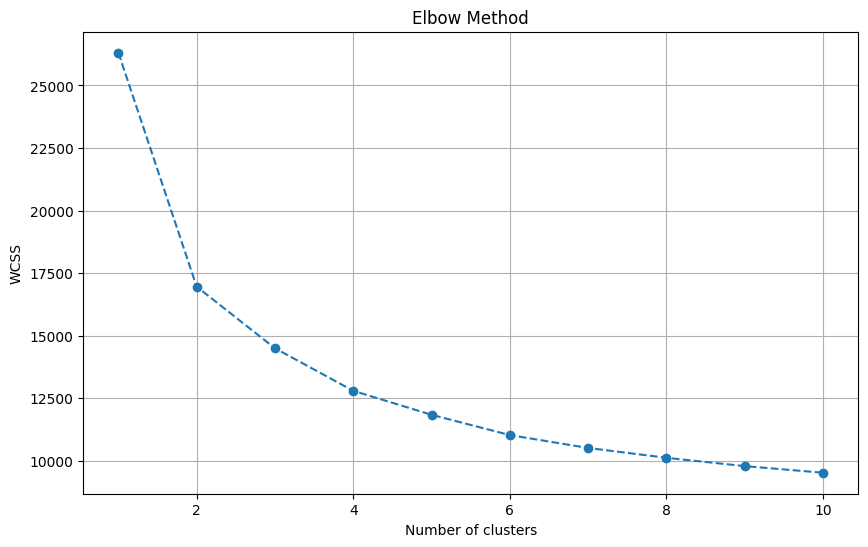

In [250]:
## plot the wcss graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_features, marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [259]:
import pprint

pprint.pprint(list(features_df.columns))

['24/7 Power Backup',
 '24x7 Security',
 'ATM',
 'Aerobics Centre',
 'Airy Rooms',
 'Amphitheatre',
 'Badminton Court',
 'Bank Attached Property',
 'Banquet Hall',
 'Bar/Chill-Out Lounge',
 'Barbecue',
 'Basketball Court',
 'Billiards',
 'Bowling Alley',
 'Bus Shelter',
 'Business Lounge',
 'CCTV Camera Security',
 'Cafeteria',
 'Card Room',
 'Centrally Air Conditioned',
 "Children's Play Area",
 'Cigar Lounge',
 'Club House',
 'Club house / Community Center',
 'Community Hall',
 'Conference room',
 'Creche/Day care',
 'Cricket Pitch',
 'Earthquake Resistant',
 'Entrance Lobby',
 'False Ceiling Lighting',
 'Feng Shui / Vaastu Compliant',
 'Fitness Centre / GYM',
 'Flower Garden',
 'Food Court',
 'Foosball',
 'Football',
 'Fountain',
 'Gated Community',
 'Gazebo',
 'Golf Course',
 'Grocery Shop',
 'Gymnasium',
 'High Ceiling Height',
 'High Speed Elevators',
 'Infinity Pool',
 'Intercom Facility',
 'Internet/wi-fi connectivity',
 'Jacuzzi',
 'Jogging Track',
 'Landscape Garden',
 'Lawn 

In [264]:
## assigning weights based on percived luxury contribution

weights = {
    '24/7 Power Backup': 6,
    '24x7 Security': 7,
    'ATM': 3,
    'Aerobics Centre': 5,
    'Airy Rooms': 5,
    'Amphitheatre': 8,
    'Badminton Court': 6,
    'Bank Attached Property': 2,
    'Banquet Hall': 7,
    'Bar/Chill-Out Lounge': 8,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 6,
    'Bowling Alley': 9,
    'Bus Shelter': 2,
    'Business Lounge': 8,
    'CCTV Camera Security': 7,
    'Cafeteria': 6,
    'Card Room': 5,
    'Centrally Air Conditioned': 9,
    "Children's Play Area": 6,
    'Cigar Lounge': 9,
    'Club House': 7,
    'Club house / Community Center': 7,
    'Community Hall': 5,
    'Conference room': 8,
    'Creche/Day care': 6,
    'Cricket Pitch': 7,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 8,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 5,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 6,
    'Fountain': 5,
    'Gated Community': 7,
    'Gazebo': 7,
    'Golf Course': 10,
    'Grocery Shop': 4,
    'Gymnasium': 8,
    'High Ceiling Height': 7,
    'High Speed Elevators': 8,
    'Infinity Pool': 10,
    'Intercom Facility': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 6,
    'Landscape Garden': 6,
    'Lawn Tennis Court': 7,
    'Library': 7,
    'Lift(s)': 6,
    'Lounge': 7,
    'Low Density Society': 8,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 6,
    'Natural Light': 5,
    'Natural Pond': 6,
    'No open drainage around': 4,
    'Park': 5,
    'Pergola': 6,
    'Piped Gas': 5,
    'Piped-gas': 5,
    'Pool Table': 5,
    'Power Back up Lift': 6,
    'Power Back-up': 6,
    'Private Garden / Terrace': 8,
    'Property Staff': 6,
    'RO System': 5,
    'Rain Water Harvesting': 5,
    'Reading Lounge': 7,
    'Recently Renovated': 6,
    'Reflexology Park': 7,
    'Restaurant': 7,
    'Salon': 7,
    'Sauna': 8,
    'School': 4,
    'Security / Fire Alarm': 7,
    'Security Personnel': 7,
    'Separate entry for servant room': 6,
    'Sewage Treatment Plant': 5,
    'Shopping Centre': 6,
    'Skating Rink': 6,
    'Solar Lighting': 6,
    'Spa': 8,
    'Spacious Interiors': 7,
    'Squash Court': 7,
    'Steam Room': 8,
    'Sun Deck': 6,
    'Swimming Pool': 8,
    'Terrace Garden': 7,
    'Theatre': 8,
    'Toddler Pool': 6,
    'Vastu Compliant': 5,
    'Video Door Security': 7,
    'Visitor Parking': 6,
    'Visitors Parking': 6,
    'Volley Ball Court': 6,
    'Waiting Lounge': 7,
    'Waste Disposal': 5,
    'Water Softener Plant': 5,
    'Water Storage': 5,
    'Water purifier': 5,
    'Water softening plant': 5,
    'Wi-Fi Connectivity': 7,
    'Yoga/Meditation Area': 7
}

In [271]:
## calculating luxury score
luxury_score = features_df[list(weights.keys())].multiply(list(weights.values())).sum(axis =1)

In [272]:
df['luxury_score'] = luxury_score

In [273]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,bptp visionnaire,sector 70,5.25,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3+,servant room,3.0,North-East,New Property,"['Good Earth City Center 2', 'Kunskapsskolan International School', 'Peace Taekwondo Academy', 'Rama krishna public school', 'Suraj School Sector 75', 'Axis Bank ATM, Sector 57', 'Sparsh Hospital, Sohna Rd', 'Oriental Bank of Commerce Palra Rd', 'The Federal Bank Ltd Palra', 'HDFC Bank Darbaripur Rd', 'Central Bank Of IndiaSohna Rd', 'Tata Projects Limited', 'IndianOil, Hasanpur', 'HPCL Sadhuram & Sons Petromart', 'RAMA Filling Station']","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,290.0,NaN,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Maintenance Staff, Water Storage, Park, Visitor Parking, Waste Disposal, Rain Water Harvesting]",45
1,house,independent,sector 43,2.10,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3+,servant room,5.0,West,New Property,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,61.0,NaN,0,1,0,0,0,1,"[Maintenance Staff, Water Storage, Visitor Parking, Waste Disposal]",22
2,house,independent,sector 54,5.00,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3+,servant room,5.0,North,Relatively New,"['Sector 53-54 metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Hanuman Mandir', 'New Life Church', 'Indusind bank ATM', 'Citi bank ATM', 'Icici bank ATM', 'State bank ATM', 'Icici bank ATM', 'Arunodaya Deseret Eye Hospital', 'Paras Hospital Gurgaon', 'Surgicare Hospital Gurgaon', 'The Dental Lounge', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Apollo Pharmacy', 'Medisca', 'HCG CNG Station', 'Heera Fuel Station', 'Hdfc bank & atm', 'Icici bank', 'Hdfc bank', 'Axis bank', 'Indusind bank', 'Kotak mahindra bank', 'State bank of india', '222', 'Naivedyam Restaurant', 'Clock tower', 'Bikanerwala', 'Burger Singh', 'Wat-a-Burger', 'Starbucks', ""Carl's Jr."", 'Shophouse by Kylin', 'Cafe Tonini', 'Sagar Ratna', 'Suncity School', 'Iilm University', 'IILM', 'Sushant College of Arts & Architectur

In [274]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [275]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2542,flat,aipl the peaceful homes3.,sector 70,2.60,12009.0,2170.0,Carpet area: 2165 (201.14 sq.m.),3,2,2,12.0,NaN,Moderately Old,NaN,NaN,2165.0,0,1,0,0,0,1,74
671,house,independent,sector 2,6.00,24691.0,(226 sq.m.) Plot Area,Plot area 270(225.75 sq.m.),5,6,3+,3.0,East,Old Property,NaN,270.0,NaN,1,0,0,1,1,0,34
2499,flat,beverley park 1,sector 43,8.44,16230.0,5200.0,Super Built up area 5200(483.1 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.)Carpet area: 4900 sq.ft. (455.22 sq.m.),4,5,3,9.0,North-East,Moderately Old,5200.0,5000.0,4900.0,0,1,0,0,0,2,120
506,house,independent,sector 8,0.59,10085.0,(54 sq.m.) Plot Area,Plot area 585(54.35 sq.m.),2,2,2,2.0,NaN,Moderately Old,NaN,585.0,NaN,0,0,0,0,1,1,5
1030,flat,emaar mgf palm hills4.,sector 77,1.50,12744.0,1180.0,Super Built up area 1450(134.71 sq.m.)Carpet area: 1177 sq.ft. (109.35 sq.m.),3,3,3,4.0,North-East,Relatively New,1450.0,NaN,1177.0,0,0,0,0,0,0,114


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3881 non-null   object 
 1   society              3880 non-null   object 
 2   sector               3881 non-null   object 
 3   price                3863 non-null   float64
 4   price_per_sqft       3863 non-null   float64
 5   area                 3880 non-null   object 
 6   areaWithType         3881 non-null   object 
 7   bedRoom              3881 non-null   int64  
 8   bathroom             3881 non-null   int64  
 9   balcony              3881 non-null   object 
 10  floorNum             3860 non-null   float64
 11  facing               2739 non-null   object 
 12  agePossession        3881 non-null   object 
 13  super_built_up_area  1926 non-null   float64
 14  built_up_area        1792 non-null   float64
 15  carpet_area          1977 non-null   f

In [278]:
df.to_csv('gurgaon_properties_cleaned_v2', index= False)